In [1]:
# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
import patsy

In [2]:
# Loading data from datasets
df_capes = pd.read_csv("CapesCleanedEnrolled.csv")
df_income = pd.read_csv("income_dataset.csv")
df_capes

,Unnamed: 0,Instructor,Department,Rcmnd Instr,Average Grade Expected,Classes Taught,Enrolled
0,0,"Ben-Yosef, Erez",Anthropology,100.000000,3.6400,1.0,19.0
1,1,"D'Alpoim Guedes, Jade A",Anthropology,100.000000,3.7500,1.0,39.0
2,2,"Marchetto, Maria Carolina",Anthropology,100.000000,3.9100,1.0,25.0
3,3,"Non, Amy L",Anthropology,90.966667,3.2800,3.0,91.0
4,4,"Lew, Caroline Horton",Anthropology,88.100000,3.6850,2.0,72.0
...,...,...,...,...,...,...,...
1534,1534,"Pafunda, Danielle",Literature,98.075000,3.8075,4.0,139.0
1535,1535,"Johnson, Sara E.",Literature,97.200000,3.6900,1.0,45.0
1536,1536,"Morse, Ainsley",Literature,100.000000,3.7000,2.0,30.0
1537,1537,"Kokotovic, Milos",Literature,100.000000,3.7550,2.0,43.0


In [3]:
# Standardizing the strings in order to combine 
def last_name(string):
    end = string.find(',')
    return string[0:end].upper()

def first_name(string):
    start = string.find(',')
    name = string[start+2:].upper()
    space = name.find(' ')
    if (space != -1):
        return name[:space+2]
    return name

def uppercase(string):
    return string.upper()

def first_name_income(string):
    name = string.upper()
    space = name.find(' ')
    if (space != -1):
        return name[:space+2]
    return name

In [4]:
# Standardizing Capes Set
df_capes['Last Name'] = df_capes['Instructor'].apply(last_name)
df_capes['First Name'] = df_capes['Instructor'].apply(first_name)
df_capes['Instructor'] = df_capes['Last Name'] + ', ' + df_capes['First Name']

# Standardizing Income Set
df_income['First Name'] = df_income['First Name'].apply(first_name_income)
df_income['Instructor'] = df_income['Last Name'] + ', ' + df_income['First Name']

In [5]:
# Merge datasets and get rid of merge columns
df = df_income.merge(df_capes, on=['Instructor'])
df = df.drop(['Unnamed: 0_x', 'Last Name_x', 'First Name_x', 'Instructor', 'Unnamed: 0_y', 'Last Name_y', 'First Name_y'], axis=1)
df

,Title,Regular Pay,Department,Rcmnd Instr,Average Grade Expected,Classes Taught,Enrolled
0,LECTURER - ACADEMIC YEAR,40000.0,Electrical & Computer Eng.,95.120000,3.802000,5.0,196.0
1,LECTURER - ACADEMIC YEAR - ONE OR TWO QUARTERS,10000.0,Psychology,97.000000,3.250000,1.0,52.0
2,LECTURER - ACADEMIC YEAR - CONTINUING,50000.0,Chemistry,90.575000,3.115000,4.0,1356.0
3,LECTURER - ACADEMIC YEAR - ONE OR TWO QUARTERS,20000.0,Mathematics,90.450000,3.350000,2.0,491.0
4,LECTURER - ACADEMIC YEAR - CONTINUING,130000.0,Education Studies,97.900000,3.980000,1.0,55.0
...,...,...,...,...,...,...,...
1030,PROF - ACADEMIC YEAR - B/E/E,200000.0,Rady School of Management,82.200000,3.810000,1.0,52.0
1031,ASST PROF - ACADEMIC YEAR,100000.0,Chemistry,92.300000,3.125000,2.0,513.0
1032,VIS ASSOC PROF,140000.0,Rady School of Management,91.216667,3.546667,6.0,401.0
1033,PROF - ACADEMIC YEAR,140000.0,Mathematics,96.150000,3.210000,2.0,43.0


# Data Analysis

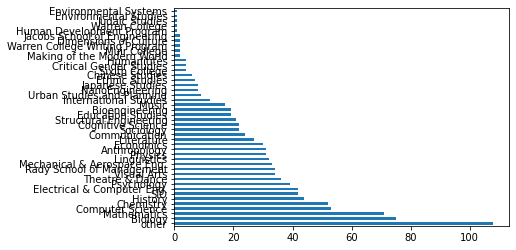

In [6]:
df['Department'].value_counts().plot(kind='barh')

In [7]:
df = (df[(df['Department'] != 'other')])

# Determine Outliers for Department
lower, upper = np.percentile(df['Department'].value_counts(), [25, 75])
iqr = upper - lower
lower_cutoff = lower - 1.5 * iqr
upper_cutoff = upper + 1.5 * iqr
print("Lower 25: ", lower_cutoff, "\nUpper 25: ", upper_cutoff)

# To see which ones are outliers
df['Department'].value_counts()

# Get rid of the outliers
df = (df[(df['Department'] != 'Mathematics') & (df['Department'] != 'Biology')])
df

Lower 25:  -40.25 
Upper 25:  77.75


,Title,Regular Pay,Department,Rcmnd Instr,Average Grade Expected,Classes Taught,Enrolled
0,LECTURER - ACADEMIC YEAR,40000.0,Electrical & Computer Eng.,95.120000,3.802000,5.0,196.0
1,LECTURER - ACADEMIC YEAR - ONE OR TWO QUARTERS,10000.0,Psychology,97.000000,3.250000,1.0,52.0
2,LECTURER - ACADEMIC YEAR - CONTINUING,50000.0,Chemistry,90.575000,3.115000,4.0,1356.0
4,LECTURER - ACADEMIC YEAR - CONTINUING,130000.0,Education Studies,97.900000,3.980000,1.0,55.0
5,LECTURER - ACADEMIC YEAR - ONE OR TWO QUARTERS,30000.0,Computer Science,83.200000,3.270000,2.0,243.0
...,...,...,...,...,...,...,...
1023,ASST PROF - ACADEMIC YEAR - B/E/E,110000.0,Computer Science,80.400000,3.310000,1.0,123.0
1027,PROF - ACADEMIC YEAR - B/E/E,140000.0,Bioengineering,76.000000,3.590000,1.0,73.0
1030,PROF - ACADEMIC YEAR - B/E/E,200000.0,Rady School of Management,82.200000,3.810000,1.0,52.0
1031,ASST PROF - ACADEMIC YEAR,100000.0,Chemistry,92.300000,3.125000,2.0,513.0


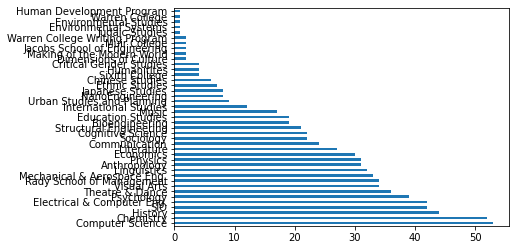

In [8]:
df['Department'].value_counts().plot(kind='barh')

(array([ 7.,  2.,  3.,  3.,  7., 17.,  4.,  5.,  0.,  5.]),
 array([ 10000.,  32000.,  54000.,  76000.,  98000., 120000., 142000.,
        164000., 186000., 208000., 230000.]),
 <a list of 10 Patch objects>)

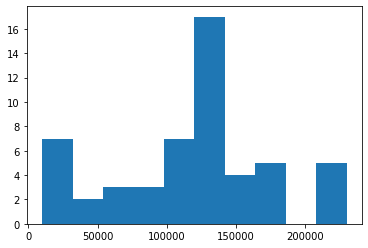

In [24]:
plt.hist(df[df['Department'] =='Computer Science']['Regular Pay'])

(array([5., 3., 8., 4., 4., 2., 0., 0., 0., 1.]),
 array([ 10000.,  44000.,  78000., 112000., 146000., 180000., 214000.,
        248000., 282000., 316000., 350000.]),
 <a list of 10 Patch objects>)

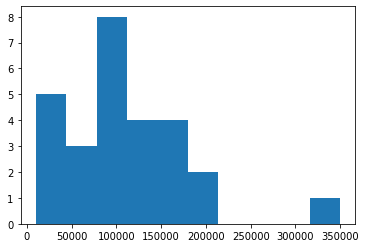

In [27]:
plt.hist(df[df['Department'] =='Literature']['Regular Pay'])

In [29]:
stats.f_oneway((df[df['Department'] =='Cognitive Science']['Regular Pay']).values,(df[df['Department'] =='Chemistry']['Regular Pay']).values, (df[df['Department'] =='Computer Science']['Regular Pay']).values )

F_onewayResult(statistic=1.2880461885251362, pvalue=0.2794731335409624)

In [35]:
stats.f_oneway((df[df['Department'] =='Environmental Systems']['Regular Pay']).values,(df[df['Department'] =='Environmental Studies']['Regular Pay']).values, (df[df['Department'] =='Ethnic Studies']['Regular Pay']).values )

F_onewayResult(statistic=1.9742700202370627, pvalue=0.21936922174605017)

In [45]:
h_Chem = df[df['Department'] == 'Economics']['Regular Pay'].values
h_Env = df[df['Department'] == 'Visual Arts']['Regular Pay'].values
t_val, p_val = ttest_ind(h_Chem, h_Env)


In [46]:
p_val

2.5823191116040665e-07

In [47]:
t_val

5.782978439675415